In [12]:
print( 1)

1


In [147]:
import pandas as pd
import numpy as np

df_csv2019 = pd.read_csv( 'reg_games_2019.csv')
df_csv2019 = pd.DataFrame(df_csv2019)

df_csv2018 = pd.read_csv( 'reg_games_2018.csv')
df_csv2018 = pd.DataFrame(df_csv2018)

df_csv2017 = pd.read_csv( 'reg_games_2017.csv')
df_csv2017 = pd.DataFrame(df_csv2017)

df_csv2016 = pd.read_csv( 'reg_games_2016.csv')
df_csv2016 = pd.DataFrame(df_csv2016)

df_csv2016.head()

FileNotFoundError: [Errno 2] File b'reg_games_2019.csv' does not exist: b'reg_games_2019.csv'

In [69]:
df_2018 = df_csv2018.copy()
df_2017 = df_csv2017.copy()
df_2016 = df_csv2016.copy()

df_total = pd.concat([df_2018, df_2017,df_2016])

import matplotlib.pyplot 
df_total['home_advantage'] = df_total['home_score'] - df_total['away_score']
df_total['away_advantage'] = -df_total['home_advantage']
df_incremental_p = pd.DataFrame(columns=['point_within','percent_change'])
def points_within_funciton (df):
    df_incremental_p = pd.DataFrame(columns=['point_within','percent_change'])
    for i in range(50):
        if  i == 0:
            df_2018_given_i =df[(df.home_advantage <= i) & (df.home_advantage >=-i)]
            new_length = len(df_2018_given_i)/len(df)
            df_incremental_p = df_incremental_p.append({'point_within': i,'percent_change':new_length, 'total_change':new_length} , ignore_index=True)

        if i>0:
            df_2018_given_i =df[(df.home_advantage <= i) & (df.home_advantage >=-i)]
            a = new_length
            new_length = len(df_2018_given_i)/len(df)
            change = new_length - a
            df_incremental_p = df_incremental_p.append({'point_within': i,'percent_change':change ,
                                                        'total_change':new_length} , ignore_index=True)
    return df_incremental_p


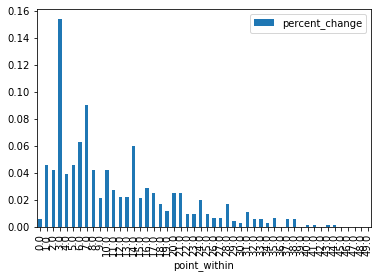

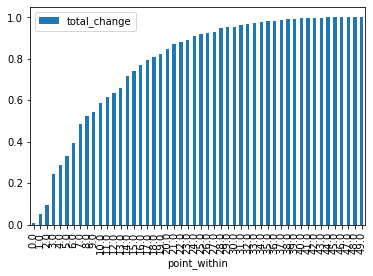

In [34]:
df_incremental_p_total = points_within_funciton(df_total)
df_incremental_p_total.head(25)
df_incremental_p_total.plot.bar(x='point_within', y = 'percent_change')
df_incremental_p_total.plot.bar(x='point_within', y = 'total_change')


In [63]:
df_names = df_total[0:15]
df_names.head()

,type,game_id,home_team,away_team,week,season,state_of_game,game_url,home_score,away_score,home_advantage,away_advantage
0,reg,2018090600,PHI,ATL,1,2018,POST,http://www.nfl.com/liveupdate/game-center/2018...,18,12,6,-6
1,reg,2018090900,BAL,BUF,1,2018,POST,http://www.nfl.com/liveupdate/game-center/2018...,47,3,44,-44
2,reg,2018090907,NYG,JAX,1,2018,POST,http://www.nfl.com/liveupdate/game-center/2018...,15,20,-5,5
3,reg,2018090906,NO,TB,1,2018,POST,http://www.nfl.com/liveupdate/game-center/2018...,40,48,-8,8
4,reg,2018090905,NE,HOU,1,2018,POST,http://www.nfl.com/liveupdate/game-center/2018...,27,20,7,-7


In [72]:
df_names1 = df_total.copy()

df_names = pd.DataFrame(df_total['home_team'])
df_names1 = pd.DataFrame(df_total['away_team'])

df_names = df_names[0:15]
df_names1 = df_names[0:15]

df_names = pd.concat([df_names, df_names1])
df_names.head()
for i in range (len(df_names)):
    string = df_names[i][0]
    print(string)

    df_home_miami = df_total[df_total.home_team == string]
    df_home_miami ['win_loss'] = df_home_miami['home_advantage']

    df_away_miami = df_total[df_total.away_team == string]
    df_away_miami ['win_loss'] = df_away_miami['away_advantage']

    df_win = pd.concat([df_away_miami, df_home_miami])
    df_win['wins'] = np.where(df_win['win_loss']>=0, 1, 0)
    df_win['losses'] = np.where(df_win['win_loss']<0, 1, 0)
    

    
df_win_ari.head()


C:\Users\Stephen\Downloads\WPy64-3741\python-3.7.4.amd64\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()
C:\Users\Stephen\Downloads\WPy64-3741\python-3.7.4.amd64\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Stephen\Downloads\WPy64-3741\python-3.7.4.amd64\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
ATL
BUF
JAX
TB
HOU
SF
TEN
CIN
PIT
KC
SEA
DAL
WAS
CHI
NYJ
LA
BAL
CAR
IND
HOU
PHI
KC
MIA
LAC
MIN
CLE
DET
ARI
NE
OAK
NYG
SEA
NYJ
NO
GB
IND
BUF
OAK
DEN
CIN
NYG
TEN
SF
LAC
DAL
CHI
NE
PIT
MIN
NYJ
MIA
PHI
HOU
BUF
DET
TB
CIN
SEA
CLE
NO
SF
BAL
KC
IND
TEN
ATL
DEN
JAX
GB
BAL
NYG
MIA
OAK
ARI
MIN
LA
DAL
WAS
PHI
TB
CAR
SEA
IND
ARI
PIT
LAC
BUF
CHI
LA
BAL
JAX
KC
SF
DEN
TEN
HOU
CAR
MIN
NE
BUF
CLE
DET
NO
DAL
LA
CIN
NYG
MIA
PHI
DEN
CLE
WAS
SEA
TB
NYJ
BAL
IND
SF
GB
NO
NE
OAK
CHI
TB
KC
NYJ
PIT
DET
ATL
HOU
LAC
LA
GB
TEN
CAR
NO
ATL
DET
ARI
NE
WAS
BUF
JAX
LAC
SEA
MIA
DAL
NYG
GB
CIN
DAL
TB
PIT
HOU
TEN
CAR
DEN
OAK
PHI
MIN
KC
CHI
WAS
ATL
CLE
SF
JAX
OAK
SEA
NE
NYG
ARI
MIA
PIT
GB
TEN
NO
BAL
CAR
CHI
BUF
IND
CLE
DEN
LA
ARI
KC
NYJ
SF
MIN
LAC
WAS
JAX
NYJ
NYG
NO
NE
BAL
IND
ATL
CAR
DEN
CIN
DET
PIT
PHI
LA
MIN
LAC
HOU
CLE
GB
DET
TB
ARI
OAK
TEN
MIA
WAS
DAL
SEA
NE
PHI
NO
WAS
BAL
CIN
TB
MIN
BUF
GB
HOU
ATL
NYG
JAX
LA
CHI
PIT
KC
DEN
MIA
ATL
DAL
CAR
NYJ
JAX
DET
PHI
LAC

NameError: name 'df_win_ari' is not defined

In [ ]:
#df '1' = 'df'
#step 1, make a new df
#step 2, append the new df with team 1,2,3,4,
#step 3, label these colums as string + _record
#step 4, return df
#step 5, sort by team interested in

In [142]:
def get_team_win_loss (df_total, team):
    df_home = df_total[df_total.home_team == team]
    df_home ['win_loss'] = df_home['home_advantage']

    df_away = df_total[df_total.away_team == team]
    df_away ['win_loss'] = df_away['away_advantage']

    df_win = pd.concat([df_away, df_home])
    df_win['wins'] = np.where(df_win['win_loss']>=0, 1, 0)
    df_win['losses'] = np.where(df_win['win_loss']<0, 1, 0)
    
    wins = df_win.wins.sum()
    losses = df_win.losses.sum()
    return wins , losses
get_win_loss(df_total, 'MIA')

MIA


C:\Users\Stephen\Downloads\WPy64-3741\python-3.7.4.amd64\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Stephen\Downloads\WPy64-3741\python-3.7.4.amd64\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


(23, 25)

In [143]:
def get_names_df (df_total, number_teams):
    x = int(number_teams/2)
    x = x
    df_names1 = df_total.copy()
    df_names = pd.DataFrame(df_total['home_team'])
    df_names1 = pd.DataFrame(df_total['away_team'])
    df_names1['home_team'] = df_names1['away_team']
    df_names1 = df_names1.drop(columns = 'away_team')
    df_names = df_names[0:x]
    df_names1 = df_names1[0:x]
    df_names = pd.concat([df_names, df_names1])
    df_names = df_names.sort_values(by = ['home_team'])
    df_names = df_names.reset_index(drop=True)
    return df_names
get_names_df(df_total, 32)

,home_team
0,ARI
1,ATL
2,BAL
3,BUF
4,CAR
5,CHI
6,CIN
7,CLE
8,DAL
9,DEN


In [144]:
df_names = get_names_df(df_total, 32)
print(df_names.loc[1])

home_team    ATL
Name: 1, dtype: object


In [146]:

def get_all_win_loss (df_total):
    df_return = pd.DataFrame()
    df_names = get_names_df(df_total, 32)
    for i in range (len(df_names)):
        string = df_names.iloc[i][0]
        win , loss = get_team_win_loss(df_total, string)
        df_return = df_return.append({'team':string, 'win': win, 'loss' : loss}, ignore_index = True)
        df_return['win_percent'] = df_return['win']/(df_return['win'] + df_return['loss'])
    return(df_return)    
        

get_all_win_loss(df_total)
    
    

C:\Users\Stephen\Downloads\WPy64-3741\python-3.7.4.amd64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Stephen\Downloads\WPy64-3741\python-3.7.4.amd64\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,loss,team,win,win_percent
0,29.0,ARI,19.0,0.395833
1,20.0,ATL,28.0,0.583333
2,21.0,BAL,27.0,0.562500
3,26.0,BUF,22.0,0.458333
4,24.0,CAR,24.0,0.500000
5,28.0,CHI,20.0,0.416667
6,28.0,CIN,20.0,0.416667
7,39.0,CLE,9.0,0.187500
8,16.0,DAL,32.0,0.666667
9,28.0,DEN,20.0,0.416667


In [ ]:
def 

In [41]:

string = 'MIA'
df_home_miami = df_total[df_total.home_team == string]
df_home_miami ['win_loss'] = df_home_miami['home_advantage']

df_away_miami = df_total[df_total.away_team == string]
df_away_miami ['win_loss'] = df_away_miami['away_advantage']

df_miami_win = pd.concat([df_away_miami, df_home_miami])
df_miami_win['wins'] = np.where(df_miami_win['win_loss']>=0, 1, 0)
df_miami_win['losses'] = np.where(df_miami_win['win_loss']<0, 1, 0)


df_miami_win.head()

C:\Users\Stephen\Downloads\WPy64-3741\python-3.7.4.amd64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Stephen\Downloads\WPy64-3741\python-3.7.4.amd64\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,type,game_id,home_team,away_team,week,season,state_of_game,game_url,home_score,away_score,home_advantage,away_advantage,win_loss,wins,losses
22,reg,2018091604,NYJ,MIA,2,2018,POST,http://www.nfl.com/liveupdate/game-center/2018...,12,20,-8,8,8,1,0
50,reg,2018093006,NE,MIA,4,2018,POST,http://www.nfl.com/liveupdate/game-center/2018...,38,7,31,-31,-31,0,1
71,reg,2018100702,CIN,MIA,5,2018,POST,http://www.nfl.com/liveupdate/game-center/2018...,27,17,10,-10,-10,0,1
107,reg,2018102500,HOU,MIA,8,2018,POST,http://www.nfl.com/liveupdate/game-center/2018...,42,23,19,-19,-19,0,1
145,reg,2018111103,GB,MIA,10,2018,POST,http://www.nfl.com/liveupdate/game-center/2018...,31,12,19,-19,-19,0,1


In [8]:
df_home1 = pd.DataFrame(df_2018.groupby('home_team'))
df_away1 = pd.DataFrame(df_2018.groupby('away_team'))
df_home1.head()

,0,1
0,ARI,type game_id home_team away_team week...
1,ATL,type game_id home_team away_team week...
2,BAL,type game_id home_team away_team week...
3,BUF,type game_id home_team away_team week...
4,CAR,type game_id home_team away_team week...


In [11]:
df_home1 = pd.DataFrame(df_2018.groupby('home_team').sum())
df_away1 = pd.DataFrame(df_2018.groupby('away_team').sum())
df_home1['difference'] = df_home1['home_score'] - df_home1['away_score']
df_away1['difference'] = df_away1['home_score'] - df_away1['away_score']
df_home=df_home1.rename(columns={"home_score": "home_score_home", "away_score": "away_score_home"})
df_away=df_away1.rename(columns={"home_score": "home_score_away", "away_score": "away_score_away"})

df_total = pd.concat([df_away, df_home])
df_total = df_total.reset_index()
df_total = df_total.sort_values(['index'])
df_total.head(64)

C:\Users\Stephen\Downloads\WPy64-3741\python-3.7.4.amd64\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,index,away_advantage,away_score_away,away_score_home,difference,game_id,home_advantage,home_score_away,home_score_home,season,week
0,ARI,-179,470.0,NaN,179,48411509548,179,649.0,NaN,48408,233
33,ARI,31,NaN,499.0,-31,48410557888,-31,NaN,468.0,48408,200
1,ATL,38,611.0,NaN,-38,48410598508,-38,573.0,NaN,48408,219
34,ATL,-125,NaN,571.0,125,48411476943,125,NaN,696.0,48408,216
35,BAL,-212,NaN,402.0,212,48410607615,212,NaN,614.0,48408,222
...,...,...,...,...,...,...,...,...,...,...,...
29,SF,-214,474.0,NaN,214,48410572263,214,688.0,NaN,48408,210
63,TB,-8,NaN,505.0,8,48411507457,8,NaN,513.0,48408,230
30,TB,-138,572.0,NaN,138,48410590899,138,710.0,NaN,48408,217
64,TEN,-80,NaN,492.0,80,48411488467,80,NaN,572.0,48408,223


In [10]:
df_home_advantage = df_2018
df_home_advantage['difference'] = df_home_advantage['home_score'] - df_home_advantage['away_score']
df_home_advantage.sort_values('difference')

,type,game_id,home_team,away_team,week,season,state_of_game,game_url,home_score,away_score,home_advantage,away_advantage,difference
250,reg,2017010113,LA,ARI,17,2016,POST,http://www.nfl.com/liveupdate/game-center/2017...,6,44,-38,38,-38
137,reg,2017111200,BUF,NO,10,2017,POST,http://www.nfl.com/liveupdate/game-center/2017...,10,47,-37,37,-37
135,reg,2018111101,CIN,NO,10,2018,POST,http://www.nfl.com/liveupdate/game-center/2018...,14,51,-37,37,-37
219,reg,2017121708,SEA,LA,15,2017,POST,http://www.nfl.com/liveupdate/game-center/2017...,7,42,-35,35,-35
93,reg,2018101800,ARI,DEN,7,2018,POST,http://www.nfl.com/liveupdate/game-center/2018...,10,45,-35,35,-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,reg,2016122406,NE,NYJ,16,2016,POST,http://www.nfl.com/liveupdate/game-center/2016...,41,3,38,-38,38
106,reg,2017102600,BAL,MIA,8,2017,POST,http://www.nfl.com/liveupdate/game-center/2017...,40,0,40,-40,40
158,reg,2018111809,NO,PHI,11,2018,POST,http://www.nfl.com/liveupdate/game-center/2018...,48,7,41,-41,41
49,reg,2017100105,HOU,TEN,4,2017,POST,http://www.nfl.com/liveupdate/game-center/2017...,57,14,43,-43,43
